# Fire Incidents 
## Toronto Fire Incidents for 9 Years

[Fire Incidents on Kaggle.com](https://www.kaggle.com/datasets/reihanenamdari/fire-incidents)

> Toronto Fire Services (TFS) provides fire protection, technical rescue services, hazardous materials response, and first responder emergency medical assistance in Toronto, Ontario, Canada. 
>
> Toronto Fire Services is currently the largest municipal fire department in Canada.
>
>This dataset includes Fire incidents as defined by the Ontario Fire Marshal related to Toronto. Starting from 2011 to 2018.
>
> This dataset has some interesting columns such as ** Estimated Dollar Loss, Latitude and Longitude, Exact time and date ** and etc.
>
> You can use this dataset for EDA and also predict various factors such as the estimated dollar loss for incidents.
I cleaned and re-structured the raw version to make the dataset usable and to save time for users.

[Original dataset](https://ckan0.cf.opendata.inter.prod-toronto.ca/tl/dataset/fire-incidents)

## Data cleaning and analysis and modeling idea

In [40]:

print('Loading libraries...')
import time
main_start = time.time()

start = time.time()

from IPython.display import Markdown
import joblib

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, fbeta_score, matthews_corrcoef, log_loss

from sklearn.model_selection import StratifiedKFold

from haversine import haversine_vector, Unit

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from category_encoders import TargetEncoder

print('Libraries loaded...')

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

Loading libraries...
Libraries loaded...
Time taken: 0 minutes and 0.0 seconds


### Load data

In [41]:
import time

# https://www.kaggle.com/datasets/reihanenamdari/fire-incidents
input_directory = '/Users/user/Documents/InfoShareAcademy/23.04.24_Sprint_03_ML/Projekt_ML/dane/Fire-Incidents.csv'
df= pd.read_csv(input_directory)

# display(Markdown("Data loading..."))
# df = pd.read_csv("data/Fire-Incidents.csv", sep=',', encoding='utf-8',low_memory=False)

# display(Markdown("Data loaded"))

# end = time.time()
# duration = end - start
# minutes = int(duration // 60)
# seconds = round(duration % 60, 2)
# print(f"Time taken: {minutes} minutes and {seconds} seconds")

### Basic data cleaning

In [42]:
cols_to_remove = ['Business_Impact', 'Estimated_Dollar_Loss', 
                  'Estimated_Number_Of_Persons_Displaced', 'TFS_Arrival_Time', 
                  'Ext_agent_app_or_defer_time', 'Fire_Under_Control_Time', 
                  'Last_TFS_Unit_Clear_Time', 'Method_Of_Fire_Control', 
                  'Count_of_Persons_Rescued', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 
                  'Status_of_Fire_On_Arrival','Longitude','Latitude','TFS_Alarm_Time',
                  'Incident_Ward','Incident_Station_Area','Smoke_Alarm_at_Fire_Origin_Alarm_Type']

df.drop(cols_to_remove, axis=1, inplace=True)


In [43]:
display(Markdown("#### Handling missing data "))

for col in list(df.columns):
    if(df[col].isnull().sum()==0):
        print(f"For column \"{col}\" nothing is missing")
    else:
        print(f"For column \"{col}\" we have {df[col].isnull().sum()} missing values!")

df.dropna(how="all", inplace=True)
initial_rows = df.shape[0]
removed_empty_rows = initial_rows - df.shape[0]
display(Markdown(f"**Removed empty rows:** {removed_empty_rows}"))

#### Handling missing data 

For column "Area_of_Origin" nothing is missing
For column "Civilian_Casualties" nothing is missing
For column "Extent_Of_Fire" nothing is missing
For column "Fire_Alarm_System_Impact_on_Evacuation" nothing is missing
For column "Fire_Alarm_System_Operation" nothing is missing
For column "Fire_Alarm_System_Presence" nothing is missing
For column "Ignition_Source" nothing is missing
For column "Material_First_Ignited" nothing is missing
For column "Possible_Cause" nothing is missing
For column "Property_Use" nothing is missing


**Removed empty rows:** 0

In [44]:
display(Markdown("#### Removing duplicates "))
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
removed_duplicates = initial_rows - df.shape[0]
print(f"Removed duplicates: {removed_duplicates}")

#### Removing duplicates 

Removed duplicates: 1293


In [45]:
display(Markdown("### Descriptive statistics "))
display(Markdown("#### Describe()"))
print(df.describe())

### Descriptive statistics 

#### Describe()

       Civilian_Casualties
count          9921.000000
mean              0.119040
std               0.475659
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max              15.000000


In [46]:
display(Markdown("#### Info()"))
print(df.info())

#### Info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9921 entries, 0 to 11213
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area_of_Origin                          9921 non-null   object
 1   Civilian_Casualties                     9921 non-null   int64 
 2   Extent_Of_Fire                          9921 non-null   object
 3   Fire_Alarm_System_Impact_on_Evacuation  9921 non-null   object
 4   Fire_Alarm_System_Operation             9921 non-null   object
 5   Fire_Alarm_System_Presence              9921 non-null   object
 6   Ignition_Source                         9921 non-null   object
 7   Material_First_Ignited                  9921 non-null   object
 8   Possible_Cause                          9921 non-null   object
 9   Property_Use                            9921 non-null   object
dtypes: int64(1), object(9)
memory usage: 852.6+ KB
None


In [47]:
display(Markdown("#### Head(10) Top 10 rows "))
display(df.head(10))

#### Head(10) Top 10 rows 

,Area_of_Origin,Civilian_Casualties,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Material_First_Ignited,Possible_Cause,Property_Use
0,Porch or Balcony,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,Undetermined,Undetermined (formerly 98),Undetermined,Multi-Unit Dwelling - Over 12 Units
1,Cooking Area or Kitchen,0,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,"Other Cooking Items (eg Toaster, Kettle, elec ...",Plastic,Under Investigation,Infirmary
2,"Living Area (e.g. living, TV, recreation, etc)",1,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,Undetermined,Undetermined (formerly 98),Undetermined,Multi-Unit Dwelling - Over 12 Units
3,Undetermined (formerly 98),0,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,Undetermined,Undetermined (formerly 98),Undetermined,"Clothing Store, Accessories, fur"
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,Matches or Lighters (unable to distinguish),Bedding,Suspected Arson,Multi-Unit Dwelling - Over 12 Units
5,Engine Area,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,Vehicle - Electrical,Electrical Wiring Insulation,Electrical Failure,Detached Dwelling
6,Concealed Ceiling Area,0,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,Circuit Wiring - Copper,Structural Member,Electrical Failure,Other care facility
7,Cooking Area or Kitchen,8,Confined to part of room/area of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,"Stove, Range-top burner","Cooking Oil, Grease",Unattended,Multi-Unit Dwelling - Over 12 Units
8,"Living Area (e.g. living, TV, recreation, etc)",0,"Spread beyond room of origin, same floor",Undetermined,Fire alarm system operation undetermined,Undetermined,Undetermined,Undetermined (formerly 98),Undetermined,Rooming/Boarding/Lodging House
9,"Hallway, Corridor",2,"Spread to other floors, confined to building",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,"Distribution Equipment (includes panel boards,...",Electrical Wiring Insulation,Electrical Failure,Multi-Unit Dwelling - Over 12 Units


In [48]:
display(Markdown("#### Shape "))
print(df.shape)

#### Shape 

(9921, 10)


#### Share of Individual Target Categories

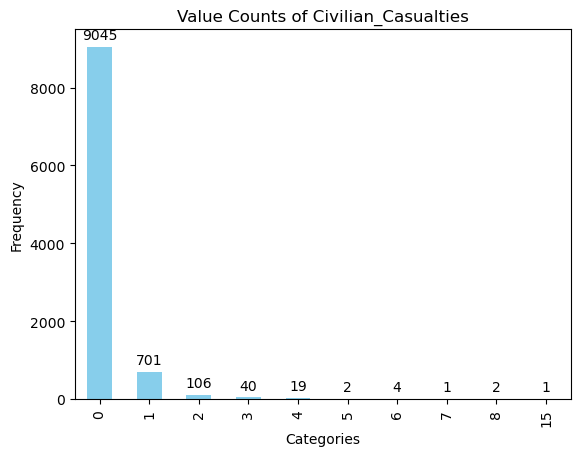

0     9045
1      701
2      106
3       40
4       19
5        2
6        4
7        1
8        2
15       1
Name: Civilian_Casualties, dtype: int64


In [49]:
display(Markdown("#### Share of Individual Target Categories"))
category_shares_values=df['Civilian_Casualties'].value_counts().sort_index()

category_shares_values.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Civilian_Casualties')
plt.xlabel('Categories')
plt.ylabel('Frequency')

for i, v in enumerate(category_shares_values):
    plt.text(i, v + 200, str(v), ha='center')


plt.show()

print(category_shares_values)

In [50]:

category_shares_percentage = df['Civilian_Casualties'].value_counts(normalize=True) * 100
display(Markdown("##### Values"))

print(f"No Civilian_Casualties: {category_shares_values[0]}\nCivilian_Casualties:     {sum(category_shares_values[1:])}")
display(Markdown("##### Percentage"))
print(f"No Civilian_Casualties:   {category_shares_percentage[0]:.3f}%\nCivilian_Casualties:     {sum(category_shares_percentage[1:]):.3f}%")

##### Values

No Civilian_Casualties: 9045
Civilian_Casualties:     876


##### Percentage

No Civilian_Casualties:   91.170%
Civilian_Casualties:     8.830%


### Data visualization

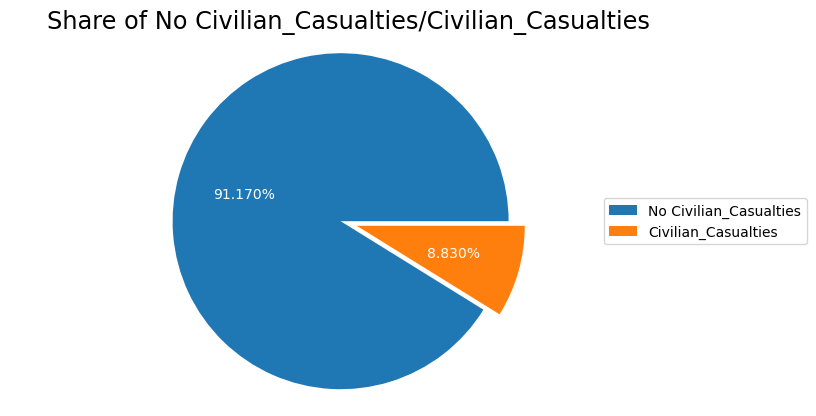

In [51]:
display(Markdown("### Data visualization"))
labels = "No Civilian_Casualties", "Civilian_Casualties"
sizes = [category_shares_percentage[0], sum(category_shares_percentage[1:])]
colors = ['blue', 'red']
explode = (0, 0.1) 

plt.title(f"Share of No Civilian_Casualties/Civilian_Casualties", fontsize='xx-large')
plt.pie(sizes, explode=explode, labels=labels, autopct='%.3f%%', startangle=0, textprops={'color': "white"})
plt.axis('equal')  
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [52]:
df['encoded_Civilian_Casualties'] = np.where(df['Civilian_Casualties'] > 0, 1, 0)

cols_to_remove = ['Civilian_Casualties']
df.drop(cols_to_remove, axis=1, inplace=True)

In [53]:
joblib.dump(df, 'data_dataframe_final.joblib')


['data_dataframe_final.joblib']

In [54]:
df = pd.get_dummies(df)


In [55]:
scaler = StandardScaler()

X = df.drop(['encoded_Civilian_Casualties'], axis=1) 
y = df['encoded_Civilian_Casualties']

X_scaled = scaler.fit_transform(X)

In [56]:
print(df.shape[1])

columns = df.columns.tolist() 

with open('data_columns.txt', 'w') as file:
    file.write('\n'.join(columns))


478


In [57]:
joblib.dump(scaler, 'data_scaler.joblib')
joblib.dump(X.columns, 'data_columns.joblib')

['data_columns.joblib']

In [58]:
start = time.time()
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

Time taken: 0 minutes and 2.17 seconds


In [59]:
start = time.time()

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1

print(f"Number of components that explain at least 95% variance: {n_components}")

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

Number of components that explain at least 95% variance: 414
Time taken: 0 minutes and 0.01 seconds


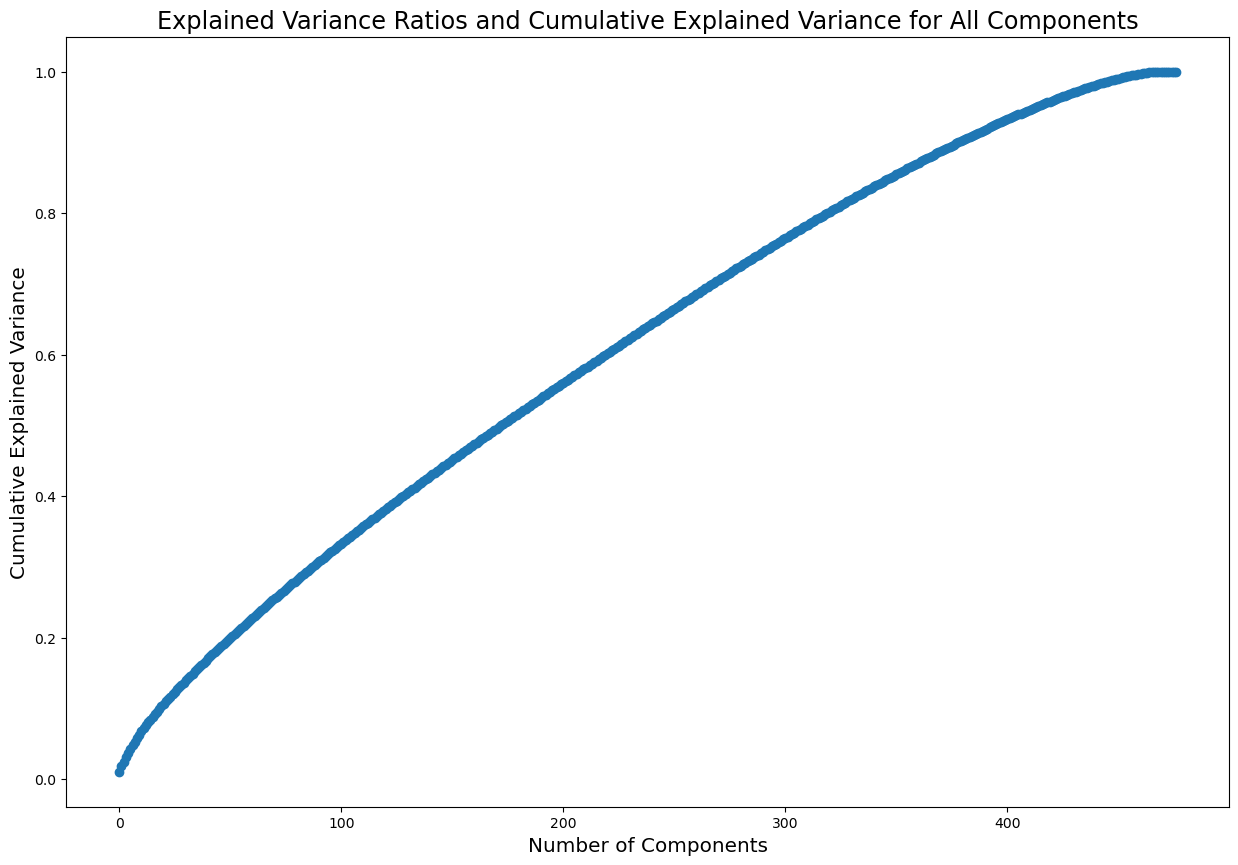

Time taken: 0 minutes and 0.53 seconds


In [60]:
start = time.time()

plt.figure(figsize=(15, 10))
plt.title('Explained Variance Ratios and Cumulative Explained Variance for All Components', fontsize='xx-large')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o', label='Cumulative explained variance')
plt.xlabel('Number of Components',fontsize='x-large')
plt.ylabel('Cumulative Explained Variance',fontsize='x-large')

plt.show()

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

In [61]:
start = time.time()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

Time taken: 0 minutes and 1.31 seconds


In [62]:
joblib.dump(pca, 'data_pca.joblib')

['data_pca.joblib']

In [63]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [64]:
# Train the model
#model = RandomForestClassifier(random_state=42)
#model = RandomForestClassifier(random_state=42, max_depth=30, min_samples_split=2, min_samples_leaf=2, n_estimators=550, criterion= 'entropy',class_weight= {0:1,1:9}, bootstrap=False)
start = time.time()

In [65]:
start = time.time()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

"""
param_grid = {
    'n_estimators': [ 200],  # Number of trees in the ensemble
    'max_depth': [2],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2, 0.3],  # Learning rate for boosting
    'scale_pos_weight': [ 10],  # Weight of the positive class in imbalance
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.7, 0.8, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  # Subsample ratio of columns when constructing each tree
    'booster': ['gbtree'],  # Booster type
    'objective': ['binary:logistic'],  # Objective function
    'importance_type': ['gain'],  # Importance type
    'min_split_loss': [0],  # Minimum loss reduction required to split a node
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization parameter
    'reg_lambda': [0, 0.1, 0.5, 1.0],  # L2 regularization parameter

}
"""
model = xgb.XGBClassifier(random_state=42)


#random_search = RandomizedSearchCV(random_state=42, estimator=model, param_distributions=param_grid,
#                                   scoring='roc_auc', cv=3, verbose=2, n_jobs=6, n_iter=10,refit=False)


#random_search = RandomizedSearchCV(random_state=42, estimator=model, param_distributions=param_grid, 
#                                   scoring=scoring, cv=3, verbose=2, n_jobs=-1, 
#                                   n_iter=100, refit=False,error_score='raise')  # n_iter controls the number of different combinations to try


#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                           scoring='roc_auc', cv=3, verbose=2,n_jobs=-1)

#random_search.fit(X_train, y_train)
#best_params = random_search.best_params_

#df_best_params = pd.DataFrame.from_dict(best_params, orient='index', columns=['Best Parameter Value'])
#df_best_params.index.name = 'Parameter'

#print(df_best_params)

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

Time taken: 0 minutes and 0.01 seconds


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 100, 'min_split_loss': 0.4, 'min_child_weight': 2, 'max_depth': 2, 'learning_rate': 0.1}
Time taken: 0 minutes and 0.81 seconds

In [66]:
start = time.time()


#model = xgb.XGBClassifier(random_state=42, n_estimators=200, max_depth=2,
#booster='gbtree', learning_rate = 0.2, eval_metric='auc',
#objective='binary:logistic', scale_pos_weight=10, importance_type='gain'
#,min_child_weight =2, min_split_loss=0)

# booster='gbtree'
# objective='binary:logistic', 
#scale_pos_weight=10, 
# importance_type='gain'
#model = xgb.XGBClassifier(random_state=42, **best_params, 
#                         eval_metric='auc',                           
#                         )
model = xgb.XGBClassifier(random_state=42, n_estimators=200, max_depth=2, booster='gbtree', learning_rate = 0.2, eval_metric='auc', objective='binary:logistic', scale_pos_weight=9, importance_type='gain' ,min_child_weight =2, min_split_loss=0)

model.fit(X_train, y_train)

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {round(seconds,2)} seconds")

Time taken: 0 minutes and 32.96 seconds


In [67]:
joblib.dump(model, 'data_model.joblib')

['data_model.joblib']

In [68]:
start = time.time()


y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.87      0.93      7245
           1       0.41      0.95      0.58       691

    accuracy                           0.88      7936
   macro avg       0.70      0.91      0.75      7936
weighted avg       0.94      0.88      0.90      7936



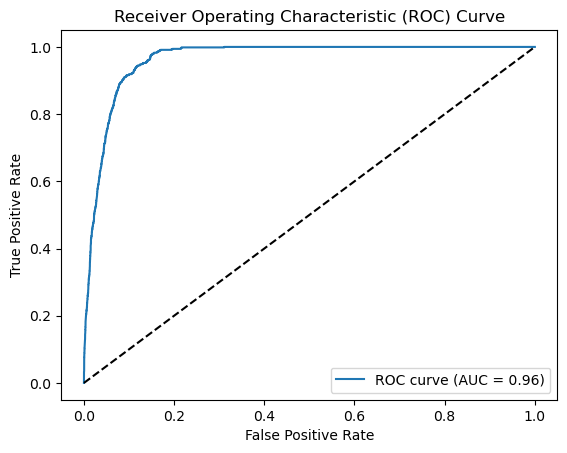

In [69]:
y_pred_prob = model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)
roc_auc = roc_auc_score(y_train, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


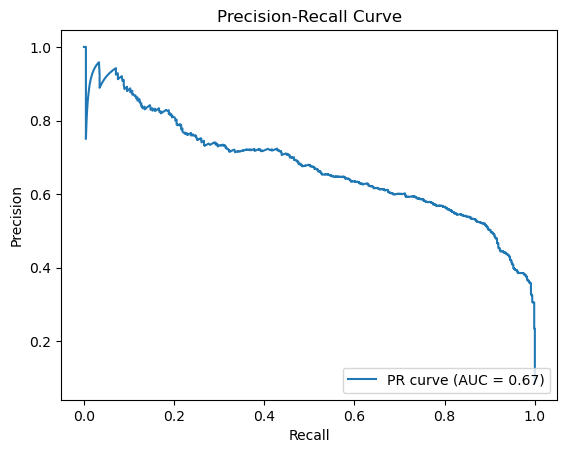

In [70]:

precision, recall, _ = precision_recall_curve(y_train, y_pred_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()



In [71]:
start = time.time()
print("AUC-ROC: ", roc_auc_score(y_train, y_pred_prob))
print("AUPRC: ", pr_auc)
fbeta = fbeta_score(y_train, y_pred, beta=2)
print("F-beta Score (beta=2): ", fbeta)
mcc = matthews_corrcoef(y_train, y_pred)
print("Matthews Correlation Coefficient: ", mcc)
y_pred_prob = model.predict_proba(X_train)
#logloss = log_loss(y_train, y_pred_prob)
#print("Log Loss: ", logloss)

end = time.time()
duration = end - start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")

AUC-ROC:  0.9635567820114476
AUPRC:  0.6738318428394371
F-beta Score (beta=2):  0.7533302710151584
Matthews Correlation Coefficient:  0.577899554543857
Time taken: 0 minutes and 0.11 seconds


In [72]:
# on TEST data

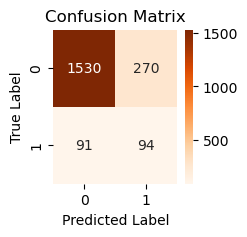

[[1530  270]
 [  91   94]]


In [83]:
#X_test_scaled = scaler.transform(X_test)
#X_test_pca = pca.transform(X_test)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(cm)

In [74]:
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1800
           1       0.26      0.51      0.34       185

    accuracy                           0.82      1985
   macro avg       0.60      0.68      0.62      1985
weighted avg       0.88      0.82      0.84      1985



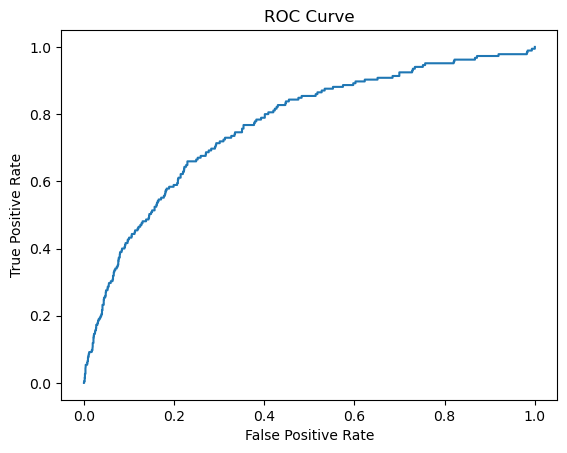

AUC-ROC: 0.7670285285285284


In [75]:
# Calculate probabilities for positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print('AUC-ROC:', auc_roc)


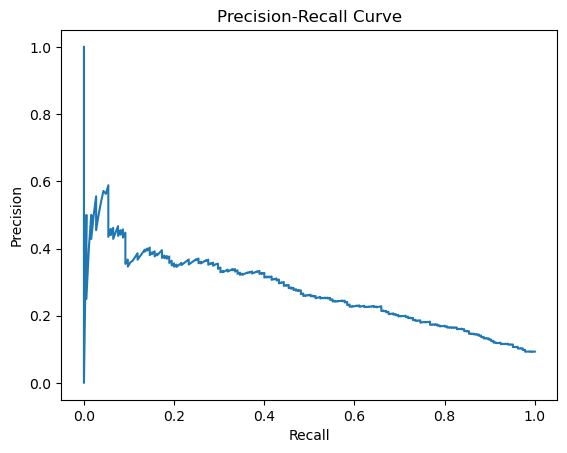

AUC-PRC: 0.27169951932442216


In [76]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Calculate AUC-PRC score
auc_prc = auc(recall, precision)
print('AUC-PRC:', auc_prc)


In [77]:
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC:", auc_roc)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_prc = auc(recall, precision)
print("AUPRC:", auc_prc)

fbeta = fbeta_score(y_test, y_pred, beta=2)
print('F-beta (beta=2) Score:', fbeta)
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient:', mcc)
log_loss_val = log_loss(y_test, y_pred_prob)
print('Log Loss:', log_loss_val)

AUC-ROC: 0.7670285285285284
AUPRC: 0.27169951932442216
F-beta (beta=2) Score: 0.4257246376811595
Matthews Correlation Coefficient: 0.2690258868366628
Log Loss: 0.3984904592586937


# Time for whole run

In [78]:
main_end = time.time()
duration = main_end - main_start
minutes = int(duration // 60)
seconds = round(duration % 60, 2)
print(f"Time taken: {minutes} minutes and {seconds} seconds")


Time taken: 0 minutes and 45.98 seconds
